<a href="https://colab.research.google.com/github/ttma333/python/blob/main/2022_12_12_%EC%88%98%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 이론
--------------------------------------------------------------------------------

## ResNet - 잔차 네트워크
- ResNet은 마이크로소프트에서 개발한 알고리즘이며 깊은 신경망을 제공합니다.
- 네트워크의 깊이가 깊어질수록 경사가 소실되거나 폭발하는 문제를 해결하고자 함
- 기존의 망과 차이가 있다면, l+2번째 비선형 함수 입력값에 l 번째 비선형 함수 출력값을 더해줄 수 있도록 지름길(shortcut)을 하나 만들어준다
- 병목 합성곱 계층을 추가하거나 크기가 작은 커널을 사용
- 152개의 훈련 가능한 계층을 수직으로 연결하여 구성
- 모든 합성곱과 풀링 계층에서 패딩옵션으로 'SAME', stride=1 사용
- 3x3 합성곱 계층 다음마다 배치 정규화 적용, 1x1 합성곱 계층에는 활성화 함수가 존재하지 않음


<img src="https://miro.medium.com/max/1200/1*6hF97Upuqg_LdsqWY6n_wg.png">

  <sub>[이미지 출처] https://towardsdatascience.com/review-resnet-winner-of-ilsvrc-2015-image-classification-localization-detection-e39402bfa5d8</sub>


# CNN 모델의 발전

* 1998: LeNet – Gradient-based Learning Applied to Document Recognition
* 2012: AlexNet – ImageNet Classification with Deep Convolutional Neural Network
* **2014: VggNet – Very Deep Convolutional Networks for Large-Scale Image Recognition**
* **2014: GooLeNet – Going Deeper with Convolutions**
* 2014: SppNet – Spatial Pyramid Pooling in Deep Convolutional Networks for Visual Recognition
* **2015: ResNet – Deep Residual Learning for Image Recognition**
* **2016: Xception – Xception: Deep Learning with Depthwise Separable Convolutions**
* **2017: MobileNet – MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Application**


* **2017: DenseNet – Densely Connected Convolutional Networks**
* 2017: SeNet – Squeeze and Excitation Networks
* 2017: ShuffleNet – ShuffleNet: An Extremely Efficient Convolutional Neural Network for Mobile Devices
* **2018: NasNet – Learning Transferable Architectures for Scalable Image Recognition**
* 2018: Bag of Tricks – Bag of Tricks for Image Classification with Convolutional Neural Networks
* **2019: EfficientNet – EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks**


vgg
densenet
mobilenet
xception
resnet
goolenet

https://www.publicdomainpictures.net/pictures/250000/nahled/dog-beagle-portrait.jpg

https://upload.wikimedia.org/wikipedia/commons/7/7a/Goldfish_1.jpg

https://upload.wikimedia.org/wikipedia/commons/4/4d/Apis_mellifera_Western_honey_bee.jpg

https://upload.wikimedia.org/wikipedia/commons/6/6b/American_Beaver.jpg

https://p1.pxfuel.com/preview/42/50/534/europe-channel-crane-harbour-crane-harbour-cranes-cranes-transport.jpg

https://upload.wikimedia.org/wikipedia/commons/f/f0/Zebra_standing_alone_crop.jpg


## MobileNet

* 성능보다 모델의 크기 또는 연산 속도 감소
* Depthwise conv와 Pointwise conv 사이에도 batch normalization과 ReLU를 삽입
* Conv layer를 활용한 모델과 정확도는 비슷하면서 계산량은 9배, 파라미터 수는 7배 줄임


## DenseNet

* 각 층은 모든 앞 단계에서 올 수 있는 지름질 연결 구성
* 특징지도의 크기를 줄이기 위해 풀링 연산 적용 필요
* 밀집 블록(dense block)과 전이층(transition layer)으로 구성 
* 전이층 : 1x1 컨볼루션과 평균값 풀링(APool)으로 구성   

<img src="https://oi.readthedocs.io/en/latest/_images/cnn_vs_resnet_vs_densenet.png" width="700">
https://upload.wikimedia.org/wikipedia/commons/f/f0/Zebra_standing_alone_crop.jpg


--------------------------------------------------------------------------------

# 캐글 api

# 학습된 코드로 예측

## 데이터 정제

In [ ]:
pwd

'/content/drive/MyDrive/dataset'

In [ ]:
cd/content/drive/MyDrive/dataset

/content/drive/MyDrive/dataset


In [ ]:
import gdown
gdown.download(id='18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd', output='dogs-vs-cats.zip')

Downloading...
From: https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd
To: /content/drive/MyDrive/dataset/dogs-vs-cats.zip
100%|██████████| 852M/852M [00:06<00:00, 141MB/s]


'dogs-vs-cats.zip'

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [11]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [ ]:
for data_batch, labels_batch in train_dataset:
    print("데이터 배치 크기:", data_batch.shape)
    print("레이블 배치 크기:", labels_batch.shape)
    break

데이터 배치 크기: (32, 180, 180, 3)
레이블 배치 크기: (32,)


## 사전 훈련된 모델 사용

## 데이터 증식을 사용한 특성 추출

### VGG16 합성곱 기반 층을 만들고 동결하기

In [6]:
from tensorflow import keras
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
conv_base.trainable = True
print("합성곱 기반 층을 동결하기 전의 훈련 가능한 가중치 개수:",
      len(conv_base.trainable_weights))

합성곱 기반 층을 동결하기 전의 훈련 가능한 가중치 개수: 26


In [ ]:
conv_base.trainable = False
print("합성곱 기반 층을 동결한 후의 훈련 가능한 가중치 개수:",
      len(conv_base.trainable_weights))


합성곱 기반 층을 동결한 후의 훈련 가능한 가중치 개수: 0


In [7]:
from keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 180, 180, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 180, 180, 3)      0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                             

In [12]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 366s 5s/step - loss: 17.9864 - accuracy: 0.8955 - val_loss: 4.5086 - val_accuracy: 0.9690
Epoch 2/50
63/63 [==============================] - 12s 193ms/step - loss: 8.0258 - accuracy: 0.9480 - val_loss: 3.2867 - val_accuracy: 0.9760
Epoch 3/50
63/63 [==============================] - 12s 193ms/step - loss: 7.6062 - accuracy: 0.9460 - val_loss: 3.8041 - val_accuracy: 0.9810
Epoch 4/50
63/63 [==============================] - 13s 197ms/step - loss: 4.1131 - accuracy: 0.9660 - val_loss: 3.8937 - val_accuracy: 0.9780
Epoch 5/50
63/63 [==============================] - 12s 194ms/step - loss: 6.7965 - accuracy: 0.9540 - val_loss: 3.5063 - val_accuracy: 0.9800
Epoch 6/50
63/63 [==============================] - 12s 191ms/step - loss: 4.2487 - accuracy: 0.9690 - val_loss: 3.7011 - val_accuracy: 0.9750
Epoch 7/50
63/63 [==============================] - 12s 190ms/step - loss: 3.5644 - accuracy: 0.9690 - val_loss: 3.3256 - val_accuracy: 0.9830


In [15]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 277s 4s/step - loss: 1.8411 - accuracy: 0.9775
테스트 정확도: 0.978


In [70]:
from tensorflow.keras.utils import image_dataset_from_directory

new_base_dir_2 = pathlib.Path("test_pic")

test_dataset_2 = image_dataset_from_directory(
    new_base_dir_2  ,
    image_size=(180, 180))


Found 8 files belonging to 1 classes.


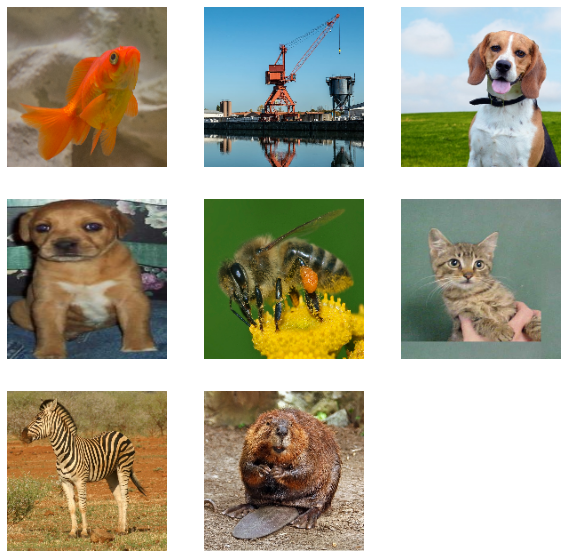

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, _ in test_dataset_2.take(1):
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [72]:
for data_batch, labels_batch in test_dataset_2:
    print("데이터 배치 크기:", data_batch.shape)
    print("레이블 배치 크기:", labels_batch.shape)
    break

데이터 배치 크기: (8, 180, 180, 3)
레이블 배치 크기: (8,)


In [73]:
test=test_model.predict(test_dataset_2,batch_size=32)

1/1 [==============================] - 0s 170ms/step


In [74]:
test

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [2]:
cd/content/drive/MyDrive/dataset

/content/drive/MyDrive/dataset


In [58]:
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img('cats_vs_dogs_small/test/dog/dog.1502.jpg', target_size = (180,180))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = test_model.predict(test_image)
#training_set.class_indices
if result[0][0] >= 0.5:
  prediction = 'dog'
else:
  prediction = 'cat'
print(prediction)

1/1 [==============================] - 0s 16ms/step
dog
